In [1]:
"Name: Tweets and Apple Stocks"
"Mentor: Austin"
"Members: Ivy, Rachel, Will, David, Rohan"

'Members: Ivy, Rachel, Will, David, Rohan'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as datetime
import seaborn as sns

In [3]:
tweets = pd.read_csv("Tweet.csv")
tweets.head(10)

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1
5,550443808606126081,aaplstocknews,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1
6,550443809700851716,iknowfirst,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1
7,550443857142611968,Cprediction,1420071016,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1
8,550443857595600896,iknowfirst_br,1420071017,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1
9,550443857692078081,Gold_prediction,1420071017,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1


In [4]:
company_tweets = pd.read_csv("Company_Tweet.csv")
company_tweets.head(10)

,tweet_id,ticker_symbol
0,550803612197457920,AAPL
1,550803610825928706,AAPL
2,550803225113157632,AAPL
3,550802957370159104,AAPL
4,550802855129382912,AAPL
5,550802745737768960,AAPL
6,550797494188142592,AAPL
7,550797275786518528,AAPL
8,550797272686923776,AAPL
9,550796617444765696,AAPL


In [5]:
apple_history = pd.read_csv("Apple_stock_history.csv")
apple_history.head(10)

# Only look at closing price at end of month
apple_close = apple_history.drop(columns=["High", "Low", "Volume", "Dividends", "Stock Splits", "Open"])
apple_close.head(10)
apple_close["Date"] = apple_close["Date"].astype(str)
apple_close.head()


,Date,Close
0,1980-12-12,0.100453
1,1980-12-15,0.095213
2,1980-12-16,0.088224
3,1980-12-17,0.090408
4,1980-12-18,0.093029


In [6]:
# A dictionary mapping "{month} {year}" with minimum day
min_months = {}

def get_min_months(date):
    date_str = str(date)
    year = int(date[:4])
    month = int(date[5:7])
    day = int(date[8:10])

    month_year_str = f"{month} {year}"

    if month_year_str in min_months.keys():
        min_months[month_year_str] = min(min_months[month_year_str], day)
    else:
        min_months[month_year_str] = day

for date in apple_close["Date"]:
    get_min_months(date)

min_months

{'12 1980': 12,
 '1 1981': 2,
 '2 1981': 2,
 '3 1981': 2,
 '4 1981': 1,
 '5 1981': 1,
 '6 1981': 1,
 '7 1981': 1,
 '8 1981': 3,
 '9 1981': 1,
 '10 1981': 1,
 '11 1981': 2,
 '12 1981': 1,
 '1 1982': 4,
 '2 1982': 1,
 '3 1982': 1,
 '4 1982': 1,
 '5 1982': 3,
 '6 1982': 1,
 '7 1982': 1,
 '8 1982': 2,
 '9 1982': 1,
 '10 1982': 1,
 '11 1982': 1,
 '12 1982': 1,
 '1 1983': 3,
 '2 1983': 1,
 '3 1983': 1,
 '4 1983': 4,
 '5 1983': 2,
 '6 1983': 1,
 '7 1983': 1,
 '8 1983': 1,
 '9 1983': 1,
 '10 1983': 3,
 '11 1983': 1,
 '12 1983': 1,
 '1 1984': 3,
 '2 1984': 1,
 '3 1984': 1,
 '4 1984': 2,
 '5 1984': 1,
 '6 1984': 1,
 '7 1984': 2,
 '8 1984': 1,
 '9 1984': 4,
 '10 1984': 1,
 '11 1984': 1,
 '12 1984': 3,
 '1 1985': 2,
 '2 1985': 1,
 '3 1985': 1,
 '4 1985': 1,
 '5 1985': 1,
 '6 1985': 3,
 '7 1985': 1,
 '8 1985': 1,
 '9 1985': 3,
 '10 1985': 1,
 '11 1985': 1,
 '12 1985': 2,
 '1 1986': 2,
 '2 1986': 3,
 '3 1986': 3,
 '4 1986': 1,
 '5 1986': 1,
 '6 1986': 2,
 '7 1986': 1,
 '8 1986': 1,
 '9 1986': 2,
 '1

In [7]:

def first_day_of_month_and_after_2015(date):
    """
    >>> first_day_of_month_and_after_2011(12-30-21) # December 30 is not first day of December 2021
    False
    >>> first_day_of_month_and_after_2011(01-02-18) # January 1 does not exist in January 2018
    True
    >>> first_day_of_month_and_after_2011(08-01-98) # August 1 is the first day of August 1998, 
    >>> # but it is before 2011
    False
    """
    year = int(date[:4])
    month = int(date[5:7])
    day = int(date[8:10])

    month_year_str = f"{month} {year}"

    if month_year_str not in min_months.keys():
        raise IndexError(f"{month_year_str} not in the keys. This error message is brought to you by Wil.")
    
    min_day = min_months[month_year_str]

    return day == min_day and year >= 2015



start_dates = apple_close["Date"].apply(first_day_of_month_and_after_2015)
apple_clean = apple_close[start_dates]
apple_clean

,Date,Close
8589,2015-01-02,24.745998
8609,2015-02-02,26.850979
8628,2015-03-02,29.333828
8650,2015-04-01,28.234015
8671,2015-05-01,29.302021
...,...,...
10267,2021-09-01,152.287735
10288,2021-10-01,142.442108
10309,2021-11-01,148.742920
10330,2021-12-01,164.770004


In [8]:
companies = pd.read_csv("Company.csv")

In [9]:
tweets_with_company = company_tweets.merge(tweets, on="tweet_id")
tweets_with_company = tweets_with_company[tweets_with_company["ticker_symbol"] == "AAPL"]
tweets_with_company['post_date'] = pd.to_datetime(tweets_with_company['post_date'], unit='s')
tweets_with_company['date'] = pd.to_datetime(tweets_with_company['post_date'].apply(lambda date: date.date()))
# only include >= 2015-1
#date_before = datetime.date(2015, 1, 1)
#tweets_with_company = tweets_with_company[tweets_with_company['post_date'].dt.date > date_before]
tweets_with_company['ConvertedDate'] = tweets_with_company['date'].dt.strftime('%Y-%m')
tweets_with_company

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,date,ConvertedDate
0,550803612197457920,AAPL,SentiQuant,2015-01-01 23:59:49,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1,2015-01-01,2015-01
2,550803610825928706,AAPL,SentiQuant,2015-01-01 23:59:48,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1,2015-01-01,2015-01
5,550803225113157632,AAPL,MacHashNews,2015-01-01 23:58:16,Rumor Roundup: What to expect when you're expe...,0,0,0,2015-01-01,2015-01
6,550802957370159104,AAPL,WaltLightShed,2015-01-01 23:57:13,"An $AAPL store line in Sapporo Japan for the ""...",2,4,4,2015-01-01,2015-01
7,550802855129382912,AAPL,2waystrading,2015-01-01 23:56:48,$AAPL - Will $AAPL Give Second entry opportuni...,0,0,0,2015-01-01,2015-01
...,...,...,...,...,...,...,...,...,...,...
1863982,1212159254884433921,AAPL,QuantWolfLine,2019-12-31 23:51:01,Imagine calling your broker-dealer and wanting...,1,0,1,2019-12-31,2019-12
1863983,1212159275637886976,AAPL,GMGRIFF_79,2019-12-31 23:51:06,"$AAPL yearly~ Heck of a year.. Jan. 2, 1999~ar...",0,0,1,2019-12-31,2019-12
1863984,1212159765914079234,AAPL,TEEELAZER,2019-12-31 23:53:03,That $SPY $SPX puuump in the last hour was the...,1,0,6,2019-12-31,2019-12
1863985,1212160410692046849,AAPL,MoriaCrypto,2019-12-31 23:55:37,I don't discriminate. I own both $aapl and $ms...,1,0,1,2019-12-31,2019-12


In [10]:
apple_clean['ConvertedDate'] = apple_clean["Date"].str[:-3]
apple_clean

/tmp/ipykernel_107/1632845725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_clean['ConvertedDate'] = apple_clean["Date"].str[:-3]


,Date,Close,ConvertedDate
8589,2015-01-02,24.745998,2015-01
8609,2015-02-02,26.850979,2015-02
8628,2015-03-02,29.333828,2015-03
8650,2015-04-01,28.234015,2015-04
8671,2015-05-01,29.302021,2015-05
...,...,...,...
10267,2021-09-01,152.287735,2021-09
10288,2021-10-01,142.442108,2021-10
10309,2021-11-01,148.742920,2021-11
10330,2021-12-01,164.770004,2021-12


In [11]:
grouped_tweets = tweets_with_company.groupby("ConvertedDate").agg("count")
grouped_tweets
# final_df = apple_clean.merge(tweets_with_company, on="ConvertedDate")
# final_df

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,date
ConvertedDate,,,,,,,,,
2015-01,34308,34308,33832,34308,34308,34308,34308,34308,34308
2015-02,34386,34386,33870,34386,34386,34386,34386,34386,34386
2015-03,39951,39951,39336,39951,39951,39951,39951,39951,39951
2015-04,37615,37615,37196,37615,37615,37615,37615,37615,37615
2015-05,26054,26054,25953,26054,26054,26054,26054,26054,26054
2015-06,26464,26464,26347,26464,26464,26464,26464,26464,26464
2015-07,31070,31070,30907,31070,31070,31070,31070,31070,31070
2015-08,33332,33332,33133,33332,33332,33332,33332,33332,33332
2015-09,29267,29267,29129,29267,29267,29267,29267,29267,29267


In [12]:
# in apple_clean, calculate % change for each month
# find correlation between frequency of apple stock mentioned in twitter post per month vs % change in price

# Overlayed bar graphs of each stock in question
# Scatterplot comparing stock market with tweets

In [13]:
percent_change = apple_clean["Close"].pct_change 
apple_clean["percent_change"] = percent_change() * 100
apple_clean

/tmp/ipykernel_107/1324153966.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_clean["percent_change"] = percent_change() * 100


,Date,Close,ConvertedDate,percent_change
8589,2015-01-02,24.745998,2015-01,NaN
8609,2015-02-02,26.850979,2015-02,8.506347
8628,2015-03-02,29.333828,2015-03,9.246773
8650,2015-04-01,28.234015,2015-04,-3.749301
8671,2015-05-01,29.302021,2015-05,3.782695
...,...,...,...,...
10267,2021-09-01,152.287735,2021-09,4.960481
10288,2021-10-01,142.442108,2021-10,-6.465148
10309,2021-11-01,148.742920,2021-11,4.423419
10330,2021-12-01,164.770004,2021-12,10.775023


    tweet_id  percent_change
1      34386        8.506347
2      39951        9.246773
3      37615       -3.749301
4      26054        3.782695
5      26464        1.655875
6      31070       -3.018201
7      33332       -6.445526
8      29267       -8.639305
9      28405        1.726703
10     18754       10.585889
11     20571       -2.754397
12     31611      -10.218156
13     31891       -8.466987
14     40502        4.817445
15     36649        9.410154
16     36692      -14.865000
17     29854        5.787565
18     26848       -2.610187
19     38061       10.595449
20     52579        1.186404
21     32325        5.424901
22     24187       -0.915401
23     24446       -1.289648
24     26570        6.082739
25     25895       10.848037
26     16452        9.045473
27     11938        2.797086
28     18023        2.004150
29     16513        4.934027
30     14257       -6.319376
31     21942        4.564458
32     19527        9.759584
33     13440       -6.241984
34     18360  

<AxesSubplot: xlabel='tweet_id', ylabel='percent_change'>

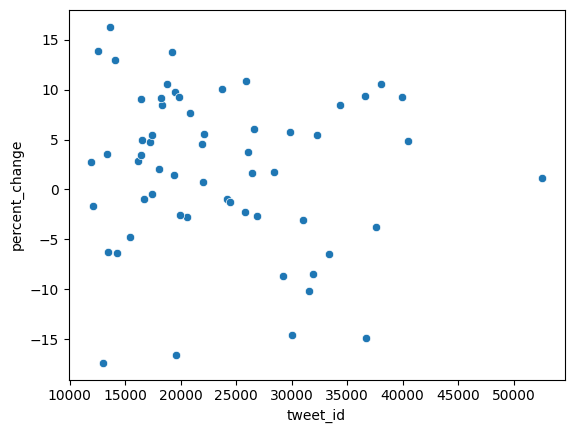

In [14]:
final_data = pd.DataFrame()
final_data["tweet_id"] = grouped_tweets["tweet_id"].reset_index()[1:]["tweet_id"]
final_data["percent_change"] = apple_clean["percent_change"].reset_index()[1:60]["percent_change"]
print(final_data)
sns.scatterplot(data = final_data, x="tweet_id", y="percent_change")

In [15]:
clean_and_grouped = grouped_tweets.merge(apple_clean, on=["ConvertedDate"])
clean_and_grouped

,ConvertedDate,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,date,Date,Close,percent_change
0,2015-01,34308,34308,33832,34308,34308,34308,34308,34308,34308,2015-01-02,24.745998,NaN
1,2015-02,34386,34386,33870,34386,34386,34386,34386,34386,34386,2015-02-02,26.850979,8.506347
2,2015-03,39951,39951,39336,39951,39951,39951,39951,39951,39951,2015-03-02,29.333828,9.246773
3,2015-04,37615,37615,37196,37615,37615,37615,37615,37615,37615,2015-04-01,28.234015,-3.749301
4,2015-05,26054,26054,25953,26054,26054,26054,26054,26054,26054,2015-05-01,29.302021,3.782695
5,2015-06,26464,26464,26347,26464,26464,26464,26464,26464,26464,2015-06-01,29.787226,1.655875
6,2015-07,31070,31070,30907,31070,31070,31070,31070,31070,31070,2015-07-01,28.888187,-3.018201
7,2015-08,33332,33332,33133,33332,33332,33332,33332,33332,33332,2015-08-03,27.026192,-6.445526
8,2015-09,29267,29267,29129,29267,29267,29267,29267,29267,29267,2015-09-01,24.691317,-8.639305
9,2015-10,28405,28405,28178,28405,28405,28405,28405,28405,28405,2015-10-01,25.117662,1.726703


In [16]:
# Next Steps
# Linear regression? check correlation/slope/etc
# Work on the slides
    # talk about filtering function
    # visualization, scatterplot
    # when stocks do bad, people talk more about it, vice versa
    # how to improve (categorize tweets to negative/positive sentiments)

<AxesSubplot: xlabel='tweet_id', ylabel='percent_change'>

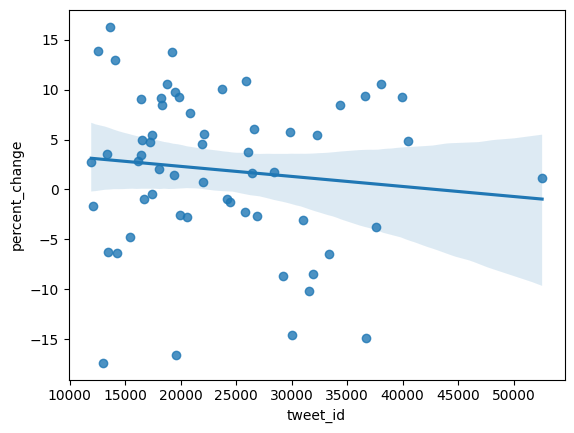

In [17]:
#sns.scatterplot(data = final_data, x="tweet_id", y="percent_change")
sns.regplot(data = final_data, x="tweet_id", y="percent_change")

Slight decreasing trend in the regression line (as the percent change for stocks approaches 0, more tweets are made - this graph is kind of useless though. 

In [18]:
id_su = (final_data['tweet_id'] - np.mean(final_data['tweet_id'])) / np.std(final_data['tweet_id'])
percent_su = (final_data['percent_change'] - np.mean(final_data['percent_change'])) / np.std(final_data['percent_change'])

r = np.mean(id_su * percent_su)
r

-0.11298072734569226

In [19]:
!pip install statsmodels==0.13.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 124.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 KB 59.1 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [20]:
import statsmodels.api as sm

Null hypothesis: The slope of the regression line is equal to 0.
Slope estimate: -0.00010062913646617312
p value: 0.395


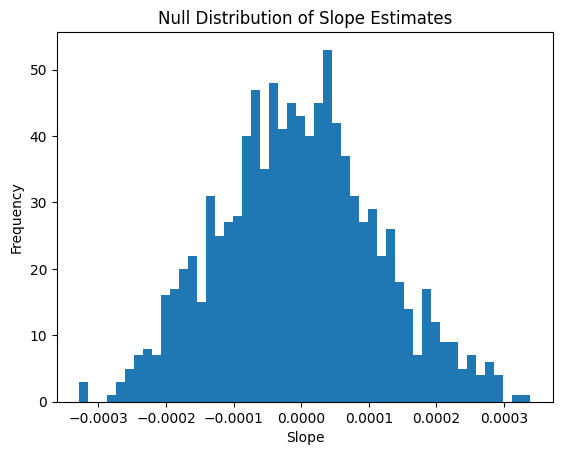

In [21]:
# Hypothesis testing if slope is 0

x = final_data['tweet_id']
y = final_data['percent_change']
x = sm.add_constant(x)

def hypothesis_test(x, y, n_simulations):
    # Our model undernull hypothesis 
    null_hypothesis = 'The slope of the regression line is equal to 0.'
    
    model = sm.OLS(y, x).fit()
    slope_estimate = model.params[1]
   
    simulated_slopes = np.zeros(n_simulations)
    
    for i in range(n_simulations):
        shuffled_y = np.random.permutation(y)
        shuffled_model = sm.OLS(shuffled_y, x).fit()
        simulated_slopes[i] = shuffled_model.params[1]
    
    p_value = np.mean(np.abs(simulated_slopes) > np.abs(slope_estimate))

    print('Null hypothesis:', null_hypothesis)
    print('Slope estimate:', slope_estimate)
    print("p value:", p_value)
    
    return simulated_slopes

simulated_slopes = hypothesis_test(x, y, 1000) # should we change to 10,000 here?

plt.hist(simulated_slopes, bins=50)
plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.title('Null Distribution of Slope Estimates')
plt.show()



<AxesSubplot: xlabel='percent_change', ylabel='tweet_id'>

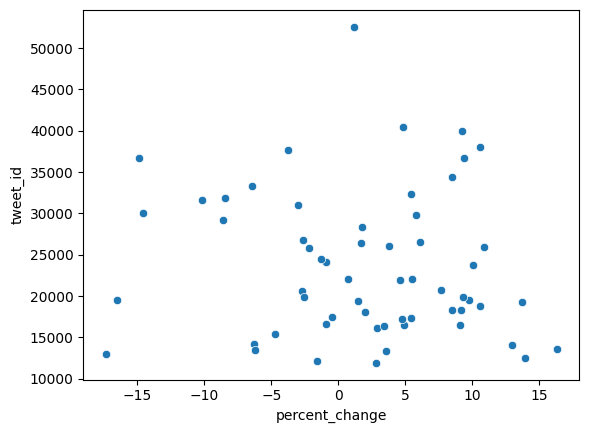

In [22]:
sns.scatterplot(data = final_data, x="percent_change", y="tweet_id")

<AxesSubplot: xlabel='percent_change', ylabel='tweet_id'>

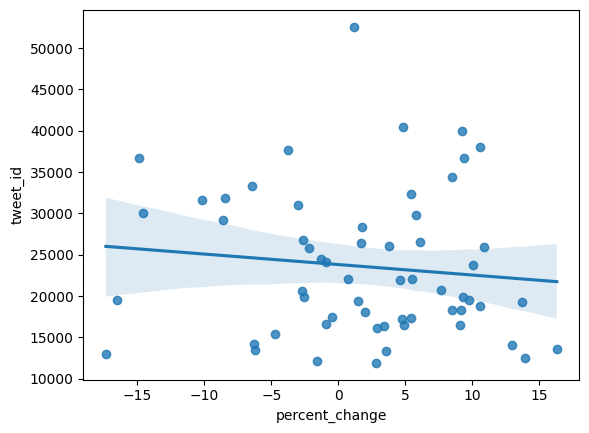

In [23]:
sns.regplot(data = final_data, x="percent_change", y="tweet_id")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d2acd236-ef44-4507-add6-c3151093e8b5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>